In [1]:
%matplotlib inline

import scipy as sp
import scipy.stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as multi

# Gene set enrichment analysis for stretch-associated cluster

## Load gene sets from selected papers

### Load gene sets from Ayyaz et al., Nature 2019

Data from:
https://www-nature-com.ezp-prod1.hul.harvard.edu/articles/s41586-019-1154-y#Sec20

In [2]:
workbook_name = 'Ayyaz2019_TableS3.xlsx'
header_row = 3
ind_col  = 0

ayyaz_S3 = pd.read_excel(workbook_name, sheet_name=None, header=header_row, index_col=ind_col)
ayyaz_S3_keys = list(ayyaz_S3.keys())


In [3]:
workbook_name = 'Ayyaz2019_TableS5.xlsx'
header_row = 3
ind_col  = 0

ayyaz_S5 = pd.read_excel(workbook_name, sheet_name=None, header=header_row, index_col=ind_col)
ayyaz_S5_keys = list(ayyaz_S5.keys())


### Load gene sets from Ayyaz et al., Nature 2019

Data from:
https://www-nature-com.ezp-prod1.hul.harvard.edu/articles/s41586-019-1154-y#Sec20

In [4]:
workbook_name = 'Ayyaz2019_TableS3.xlsx'
header_row = 3
ind_col  = 0

ayyaz_S3 = pd.read_excel(workbook_name, sheet_name=None, header=header_row, \
                         index_col=ind_col, dtype={'B':str})
ayyaz_S3_keys = list(ayyaz_S3.keys())


In [5]:
workbook_name = 'Ayyaz2019_TableS5.xlsx'
header_row = 3
ind_col  = 0

ayyaz_S5 = pd.read_excel(workbook_name, sheet_name=None, header=header_row, \
                         index_col=ind_col, dtype={'B':str})
ayyaz_S5_keys = list(ayyaz_S5.keys())


### Load Mustata et al., 2013 Fetal gene signature - upregulated in spheroids

Data from:
https://www-nature-com.ezp-prod1.hul.harvard.edu/articles/s41586-018-0257-1#Sec18

In [6]:
workbook_name = 'Mustata_et_al_2013_tables1.xlsx'
header_row = 1
use_sheet  = 'UP'
#use_col    = 'Gene Symbol'

mustata_gl = pd.read_excel(workbook_name, sheet_name=use_sheet, \
                           header=header_row,  
                           dtype={'A':str})



In [7]:
mustata_gl = list(mustata_gl['Gene Symbol'])

### Load Yui et al., 2018 Fetal gene signature - shares signature with ulcerative colitis patients

Data from: https://pubmed.ncbi.nlm.nih.gov/29249464/

In [8]:
workbook_name = 'TableS3_yui_jensen_2018.xlsx'
header_row = 3
ind_col  = 0

yui_S2 = pd.read_excel(workbook_name, sheet_name=None, header=header_row, \
                         index_col=ind_col, dtype={'B':str})
yui_S2_keys = list(yui_S2.keys())

In [9]:
yui_df = yui_S2['Table S2']

In [11]:
yui_gl = []
for gene in yui_df.loc[yui_df['CORE ENRICHMENT'] =='Yes'][0:100]['PROBE'].to_list():
    yui_gl.append(gene.title())

### Load Gregorieff et al., 2015 Yap regulated gene signature

Data from: https://pubmed.ncbi.nlm.nih.gov/26503053/

In [58]:
workbook_name = 'Gregorieff_2015_S1_Yap_regulated_gene_signature.xlsx'
header_row = 0
ind_col  = 0

greg_S1 = pd.read_excel(workbook_name, sheet_name=None, header=header_row, index_col=ind_col)
greg_S1_keys = list(greg_S1.keys())

In [67]:
yap_gl = list(greg_S1['List of Yap regulated genes'].index[0:100])

### Load Nusse et al., 2018 enriched genes in reported clusters

Paper: https://pubmed.ncbi.nlm.nih.gov/29950724/

GEO accession link: [GEO:GSE108233](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108233)

#### Enriched genes were calculated for original clusters as reported in Nusse et al., 2018

In [12]:
nusse_df = pd.read_excel('Nusse2018_cluster_enriched_top100_wilcoxranksum.xlsx')

In [13]:
nusse_df = nusse_df.add_prefix('cluster_')

In [14]:
del nusse_df['cluster_Unnamed: 0']

In [15]:
for col, val in nusse_df.iteritems():
    nusse_df[col] = nusse_df[col].str.title()

### Organize data into gene lists

In [68]:
gene_sets = {}
ayyaz_subset = ['Cluster#4', 'Cluster#5', 'Cluster#7', 'Cluster#8', 'Cluster#9', 'Cluster#11', 'Cluster#18']
for key in ayyaz_subset:
    gene_sets['Ayyaz2018_'+key] = list(ayyaz_S3[key]['gene'].values)

for key in ayyaz_S5.keys():
    if key != 'SSC2a':
        gene_sets['Ayyaz2018_'+key] = list(ayyaz_S5[key]['gene'].values)

nusse_subset = ['cluster_2','cluster_3','cluster_7', 'cluster_8', 'cluster_10', 
                'cluster_11', 'cluster_12', 'cluster_14', 'cluster_18', 'cluster_19']
for col in nusse_subset:
    gene_sets['Nusse2018_'+col] = list(nusse_df[col])

gene_sets['Mustata2013_Fetal'] = mustata_gl

gene_sets['Yui2018_Fetal'] = yui_gl

gene_sets['Gregorieff2015_Yap'] = yap_gl

# Capitalize for consistency:
for key in gene_sets:
    gene_sets[key] = [str(s).capitalize() for s in gene_sets[key]]

In [69]:
print('Number genes sets = '+str(len(gene_sets)))
print('Gene set names:')
for key in gene_sets.keys():
    print('   ',key)

Number genes sets = 22
Gene set names:
    Ayyaz2018_Cluster#4
    Ayyaz2018_Cluster#5
    Ayyaz2018_Cluster#7
    Ayyaz2018_Cluster#8
    Ayyaz2018_Cluster#9
    Ayyaz2018_Cluster#11
    Ayyaz2018_Cluster#18
    Ayyaz2018_SSC2b
    Ayyaz2018_SSC2c
    Nusse2018_cluster_2
    Nusse2018_cluster_3
    Nusse2018_cluster_7
    Nusse2018_cluster_8
    Nusse2018_cluster_10
    Nusse2018_cluster_11
    Nusse2018_cluster_12
    Nusse2018_cluster_14
    Nusse2018_cluster_18
    Nusse2018_cluster_19
    Mustata2013_Fetal
    Yui2018_Fetal
    Gregorieff2015_Yap


## Load gene set of interest, and background gene list

**Comment:** Background gene list could be all genes, or just list of genes that are markers of clusters in our data, or otherwise variable. By reducing the background gene list size, we weaken the statistical power of the analysis, makign a strong p-values more meaningful

### Background gene list:

In [70]:
# Explore multiple background gene lists
bkgnd_gl_dict = {}

#### Option 1:  a quite restricted list of 'marker genes' for the major cell types
i.e. maximal in the cluster and max-to-second-max ratio of 1.3. This is very conservative.

In [71]:
bkgnd_gl_file_name = 'perturbations_mg_list_mg150.txt'
bkgnd_gl_name = 'Marker_Genes'

bkgnd_gl_df = pd.read_table(bkgnd_gl_file_name) # Load file
bkgnd_gl    = list(bkgnd_gl_df['#Genes'].values) # Format as a list
# Capitalize for consistency:
bkgnd_gl_dict[bkgnd_gl_name] = [str(s).capitalize() for s in bkgnd_gl]

#### Option 2: list of all variable genes

In [72]:
bkgnd_gl_file_name = 'highly_variable_genes_perturbation.txt'
bkgnd_gl_name = 'Highly_variable_genes'

bkgnd_gl_df = pd.read_table(bkgnd_gl_file_name) # Load file
bkgnd_gl    = list(bkgnd_gl_df['#Genes'].values) # Format as a list
# Capitalize for consistency:
bkgnd_gl_dict[bkgnd_gl_name] = [str(s).capitalize() for s in bkgnd_gl]

#### Option 3: list of all genes (post-filter)

In [73]:
bkgnd_gl_file_name = 'all_genes_post_filter_perturbation.txt'
bkgnd_gl_name = 'All_genes'

bkgnd_gl_df = pd.read_table(bkgnd_gl_file_name) # Load file
bkgnd_gl    = list(bkgnd_gl_df['#Genes'].values) # Format as a list
# Capitalize for consistency:
bkgnd_gl_dict[bkgnd_gl_name] = [str(s).capitalize() for s in bkgnd_gl]

### The test gene list:

In [74]:
test_gl_file_name = 'stretch_associated_gene_list.txt'

test_gl_df = pd.read_table(test_gl_file_name) # Load file
test_gl    = list(test_gl_df['#Genes'].values) # Format as a list

# Capitalize for consistency:
test_gl = [str(s).capitalize() for s in test_gl]

# Ensure that test list is encompassed by background list
# (Hopefully unnecessary)
bkgnd_gl =  bkgnd_gl + list(set(test_gl) - set(bkgnd_gl))

## Set enrichment analysis (Fisher Exact test)

### Define the set enrichment function:

In [75]:
def set_enrichment(test_gl, reference_gl, background_gl):
    # test_gl, reference_gl, background_gl : lists of gene names
    
    # Expand background list to include all genes: 
    T = set(test_gl)
    R = set(reference_gl)
    B = set(background_gl) | T | R # Union
    
    n11 = len(T & R)
    n21 = len((B-T) & R)
    n12 = len(T & (B-R))
    n22 = len((B-T) & (B-R))
    
    # Debugging:
    if 0:
        print(len(T))
        print(len(R))
        print(len(B))
        print([[n11, n21], [n12, n22]])
        print(' ')
    
    # The test:
    odds_ratio, p_value_gtr = sp.stats.fisher_exact([[n11, n21],[n12, n22]], \
                                                   alternative='greater')
    odds_ratio, p_value_less = sp.stats.fisher_exact([[n11, n21],[n12, n22]], \
                                                   alternative='less')

    return p_value_gtr, p_value_less, n11, n11/len(T), n11/len(R)

### Carry out gene set enrichment:

In [76]:
# Try all three background lists: 'All_genes', 'Highly_variable_genes', 'Marker_Genes'


In [77]:
# Make multi-level columns for the dataframe:
iterables = [list(bkgnd_gl_dict.keys()),\
             ['p_gtr', 'p_less','nShared','fShared_tgt','fShared_ref','fdr_gtr']]

GSE_df = pd.DataFrame(index=gene_sets.keys() , \
                      columns=pd.MultiIndex.from_product(iterables, names=['background', 'metrics']))


for bg_opt in bkgnd_gl_dict.keys():
    use_bg = bkgnd_gl_dict[bg_opt]

    for key in gene_sets.keys():
        p_value_gtr, p_value_less, nShared, fShared_tgt, fShared_ref = \
            set_enrichment(test_gl, gene_sets[key], use_bg)
        GSE_df.loc[key, (bg_opt,'p_gtr')] = p_value_gtr
        GSE_df.loc[key, (bg_opt,'p_less')] = p_value_less
        GSE_df.loc[key, (bg_opt,'nShared')] = nShared
        GSE_df.loc[key, (bg_opt,'fShared_tgt')] = fShared_tgt
        GSE_df.loc[key, (bg_opt,'fShared_ref')] = fShared_ref
        
        # Multiple hypothesis correction:
        _, pvals_corrected, _, _, =multi.multipletests(GSE_df[(bg_opt,'p_gtr')], \
                                                       alpha=0.05, method='fdr_bh')
        GSE_df.loc[:,(bg_opt,'fdr_gtr')] = list(pvals_corrected)
    

#GSE_df

#### Output table

In [85]:
GSE_df = GSE_df.sort_values(by=[('Highly_variable_genes','fdr_gtr')])

In [86]:
GSE_df

background           Marker_Genes                                   \
metrics                     p_gtr       p_less nShared fShared_tgt   
Mustata2013_Fetal         0.28607     0.773735      55    0.366667   
Ayyaz2018_SSC2c       0.000231671     0.999931      22    0.146667   
Ayyaz2018_Cluster#18    0.0512584     0.975057      16    0.106667   
Nusse2018_cluster_19      0.47662      0.62693      21        0.14   
Nusse2018_cluster_12     0.603033     0.502544      20    0.133333   
Gregorieff2015_Yap       0.749938      0.34456      18        0.12   
Ayyaz2018_Cluster#5      0.880602     0.212817       8   0.0533333   
Ayyaz2018_SSC2b          0.939496     0.123706       7   0.0466667   
Nusse2018_cluster_8      0.999806  0.000623428       9        0.06   
Nusse2018_cluster_2      0.999638   0.00111135       9        0.06   
Yui2018_Fetal            0.999847  0.000519605       8   0.0533333   
Ayyaz2018_Cluster#4      0.998098   0.00727451       4   0.0266667   
Ayyaz2018_Cluster#11     0.997872   0.00803599       4   0.0266667   
Nusse2018_cluster_7      0.999996  1.90509e-05       6        0.04   
Nusse2018_cluster_3      0.999995  2.47513e-05       6        0.04   
Ayyaz2018_Cluster#9      0.999672   0.00172362       3        0.02   
Nusse2018_cluster_14     0.999999  3.75854e-06       5   0.0333333   
Ayyaz2018_Cluster#8      0.999507   0.00248534       3        0.02   
Ayyaz2018_Cluster#7       0.99949   0.00256187       3        0.02   
Nusse2018_cluster_10            1    6.263e-07       4   0.0266667   
Nusse2018_cluster_11            1  7.90055e-07       4   0.0266667   
Nusse2018_cluster_18            1    6.263e-07       4   0.0266667   

background                                 Highly_variable_genes            \
metrics              fShared_ref   fdr_gtr                 p_gtr    p_less   
Mustata2013_Fetal       0.173502  1.000000           4.39045e-28         1   
Ayyaz2018_SSC2c             0.44  0.005097           1.89692e-20         1   
Ayyaz2018_Cluster#18        0.32  0.563843            1.4031e-12         1   
Nusse2018_cluster_19        0.21  1.000000           3.17097e-12         1   
Nusse2018_cluster_12         0.2  1.000000           2.81058e-11         1   
Gregorieff2015_Yap          0.18  1.000000           1.78822e-09         1   
Ayyaz2018_Cluster#5         0.16  1.000000           0.000179005  0.999974   
Ayyaz2018_SSC2b             0.14  1.000000            0.00103644  0.999824   
Nusse2018_cluster_8         0.09  1.000000            0.00473774  0.998669   
Nusse2018_cluster_2         0.09  1.000000            0.00472451  0.998673   
Yui2018_Fetal               0.08  1.000000              0.014974  0.995289   
Ayyaz2018_Cluster#4         0.08  1.000000             0.0798938  0.977112   
Ayyaz2018_Cluster#11        0.08  1.000000             0.0796451  0.977207   
Nusse2018_cluster_7         0.06  1.000000              0.103203  0.958179   
Nusse2018_cluster_3         0.06  1.000000              0.103442  0.958057   
Ayyaz2018_Cluster#9         0.06  1.000000              0.224387  0.920156   
Nusse2018_cluster_14        0.05  1.000000              0.220971  0.896717   
Ayyaz2018_Cluster#8         0.06  1.000000               0.22382  0.920454   
Ayyaz2018_Cluster#7         0.06  1.000000              0.223631  0.920553   
Nusse2018_cluster_10        0.04  1.000000              0.411219  0.774545   
Nusse2018_cluster_11        0.04  1.000000              0.408807  0.776479   
Nusse2018_cluster_18        0.04  1.000000              0.405296  0.779283   

background                                                          \
metrics              nShared fShared_tgt fShared_ref       fdr_gtr   
Mustata2013_Fetal         55    0.366667    0.173502  9.658980e-27   
Ayyaz2018_SSC2c           22    0.146667        0.44  2.086612e-19   
Ayyaz2018_Cluster#18      16    0.106667        0.32  1.028939e-11   
Nusse2018_cluster_19      21        0.14        0.21  1.744034e-11   
Nusse2018_cluster_12      

## Plot results

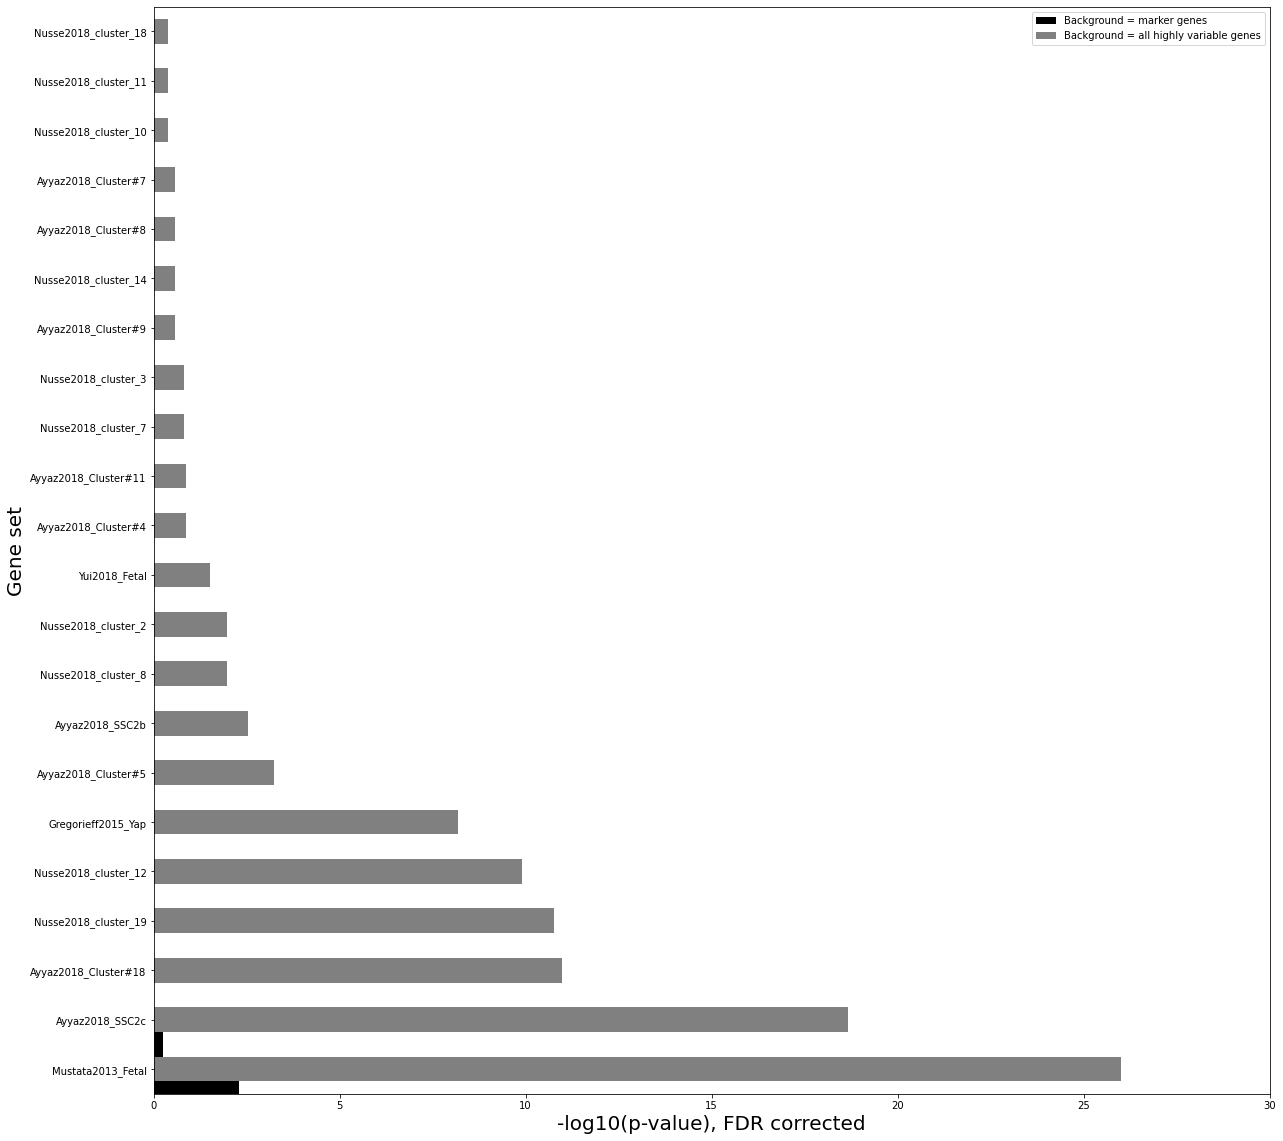

In [87]:
y1 = -np.log10(GSE_df[('All_genes','fdr_gtr')].sort_values())
y2 = -np.log10(GSE_df[('Highly_variable_genes','fdr_gtr')].sort_values())
y3 = -np.log10(GSE_df[('Marker_Genes','fdr_gtr')].sort_values())

ind = np.arange(len(y1))
width = 0.5

fig, ax = plt.subplots(figsize=(20, 20))
#ax.barh(ind, y1, width, color='red', label='All_genes')
ax.barh(ind, y3, width, color='black', label='Background = marker genes')
ax.barh(ind + width, y2, width, color='grey', label='Background = all highly variable genes')
#ax.barh(ind + 2*width, y3, width, color='blue', label='Marker_Genes')

ax.set(yticks=ind+width , yticklabels=list(GSE_df.index) , ylim=[2*width - 1, len(y1)])
ax.legend()
ax.set(xlim=[0, 30],xticks=np.arange(0,31,5))
plt.xlabel('-log10(p-value), FDR corrected', fontsize=20)
plt.ylabel('Gene set', fontsize=20)

#plt.savefig('')

plt.show()

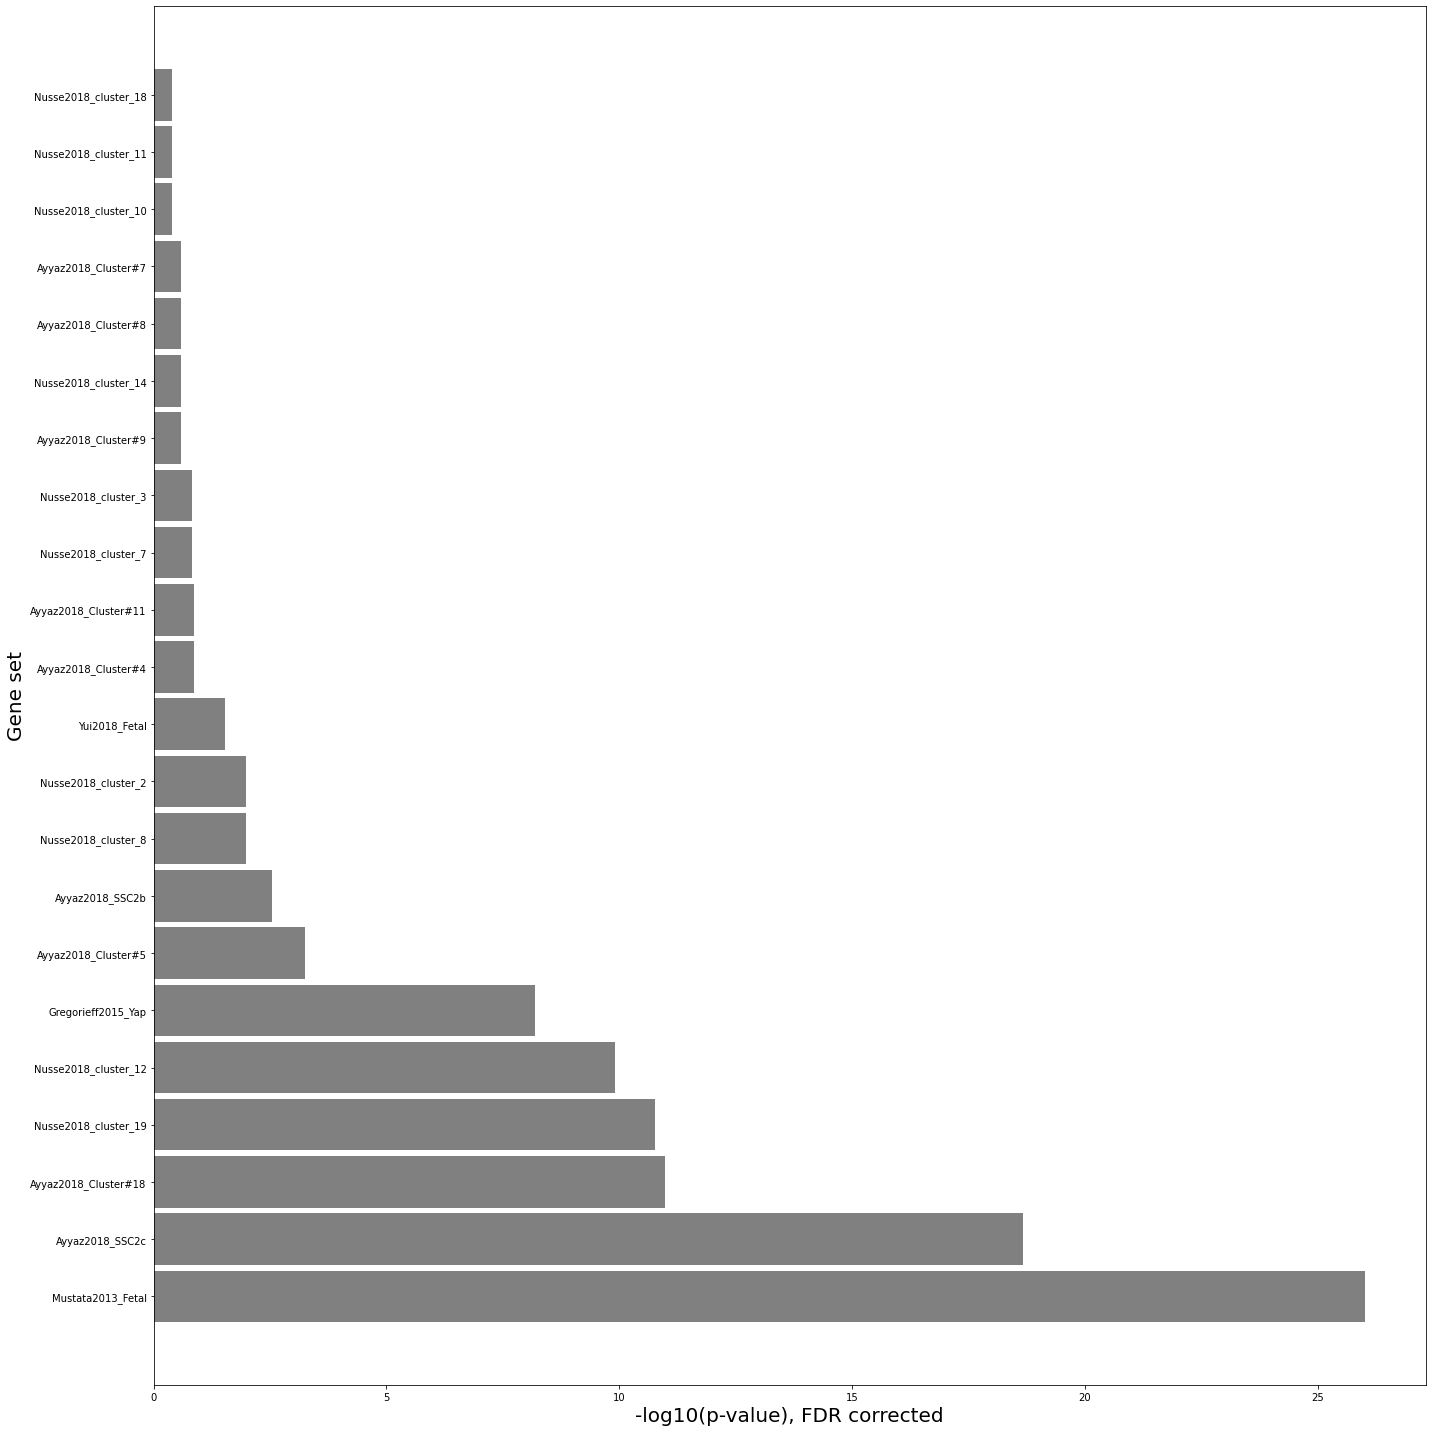

In [89]:
fig, ax = plt.subplots(figsize=(20, 20))



ind = np.arange(len(y2))
plt.barh(ind, y2, 0.9, color='grey')
#ax.barh(ind + 2*width, y3, width, color='blue', label='Marker_Genes')

ax.set(yticks=ind,yticklabels=list(GSE_df.index))
plt.ylim=[-1, len(y1)]
plt.xlim=[0, 20]
plt.xticks=np.arange(0,21,5)

plt.xlabel('-log10(p-value), FDR corrected', fontsize=20)
plt.ylabel('Gene set', fontsize=20)

#plt.legend()

plt.tight_layout()
plt.savefig('GSEA_stretch_signature_genes_barplot_ayyaz_gregorieff_mustata_nusse_yui.eps', transparent=True)

plt.show()